In [182]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [177]:
df = pd.read_csv('/Users/hanguyen/Downloads/datasets/dataset_1.csv')
#print(df.head())
print(df['Time (Local)'])


0       7
1       8
2       9
3      10
4      11
       ..
331     2
332     3
333     4
334     5
335     6
Name: Time (Local), Length: 336, dtype: int64


In [164]:
print(df['Date'].dropna().unique())

['10-Sep-12' '11-Sep-12' '12-Sep-12' '13-Sep-12' '14-Sep-12' '15-Sep-12'
 '16-Sep-12' '17-Sep-12' '18-Sep-12' '19-Sep-12' '20-Sep-12' '21-Sep-12'
 '22-Sep-12' '23-Sep-12' '24-Sep-12']


In [40]:
# Date had the most completed trips during the two weeks
print(df.columns)
count = df['Completed Trips '].groupby(df['Date']).sum()
print(count)
date_with_most_completed_trips = count.idxmax()
num_completed_trips = count.max()
print(f'The date with the most completed trips is {date_with_most_completed_trips} with {num_completed_trips} trips')

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')
Date
10-Sep-12     26
11-Sep-12     40
12-Sep-12     91
13-Sep-12     45
14-Sep-12    108
15-Sep-12    199
16-Sep-12     93
17-Sep-12     57
18-Sep-12     42
19-Sep-12     41
20-Sep-12     70
21-Sep-12    190
22-Sep-12    248
23-Sep-12    111
24-Sep-12      4
Name: Completed Trips , dtype: int64
The date with the most completed trips is 22-Sep-12 with 248 trips


QUESTION 2: What was the highest number of completed trips within a 24 hour period?

In [142]:
# Create a timestamp with date and time
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Ensure 'Time (Local)' is in 'HH:MM' format
df['Time (Local)'] = df['Time (Local)'].astype(str).str.zfill(2) + ':00'  # Add ":00" for consistency

# Combine 'Date' and 'Time (Local)' into a single 'Timestamp' column
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time (Local)'],errors='coerce')
print(df['Timestamp'])
new = pd.DataFrame(df['Timestamp'])
# Step 1: Convert 'Timestamp' to datetime and set it as the index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Step 2: Calculate the rolling 24-hour sum
df['Rolling_Sum'] = df['Completed Trips '].rolling('24H').sum()

# Step 3: Find the maximum rolling sum
max_completed_trips = df['Rolling_Sum'].max()
start_time = df['Rolling_Sum'].idxmax()
end_time = start_time + pd.Timedelta(hours=24)

print(f'The maximum number of completed trips in a 24-hour period is {max_completed_trips} trips from {start_time} to {end_time}.')

Timestamp
2012-09-10 07:00:00   2012-09-10 07:00:00
2012-09-10 08:00:00   2012-09-10 08:00:00
2012-09-10 09:00:00   2012-09-10 09:00:00
2012-09-10 10:00:00   2012-09-10 10:00:00
2012-09-10 11:00:00   2012-09-10 11:00:00
                              ...        
2012-09-24 02:00:00   2012-09-24 02:00:00
2012-09-24 03:00:00   2012-09-24 03:00:00
2012-09-24 04:00:00   2012-09-24 04:00:00
2012-09-24 05:00:00   2012-09-24 05:00:00
2012-09-24 06:00:00   2012-09-24 06:00:00
Name: Timestamp, Length: 336, dtype: datetime64[ns]
The maximum number of completed trips in a 24-hour period is 278.0 trips from 2012-09-22 16:00:00 to 2012-09-23 16:00:00.


/var/folders/q1/r9wp34d136sgrznjg7hc6bkw0000gn/T/ipykernel_48950/521551870.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Rolling_Sum'] = df['Completed Trips '].rolling('24H').sum()


QUESTION 3: Which hour of the day had the most requests during the two week period?

In [107]:
# Hour that had the most requests during 2 weeks period
count = df['Requests '].groupby(df['Time (Local)']).sum()
print(count)
hour_with_most_requests = count.idxmax()
num_requests = count.max()
print(f'The hour with the most requests is {hour_with_most_requests} with {num_requests} requests')

Time (Local)
0     142
1      96
2     100
3      35
4       9
5      14
6      28
7      22
8      29
9      26
10     28
11     47
12     53
13     55
14     71
15     71
16     82
17     98
18    119
19    156
20    107
21    112
22    174
23    184
Name: Requests , dtype: int64
The hour with the most requests is 23 with 184 requests


QUESTION 4: What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

In [182]:
# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])
def check_weekend(row):
    # extract the day of the week (0=Monday, 6=Sunday)
    weekday = row['Date'].weekday()
    if weekday == 4 and row['Time (Local)'] >= 17:
        return True
    elif weekday == 5:
        return True
    elif weekday == 6 and row['Time (Local)'] <= 3:
        return True
    return False
df['is_weekend'] = df.apply(check_weekend, axis=1)
print(df[['Date','Time (Local)','is_weekend']])

          Date  Time (Local)  is_weekend
0   2012-09-10             7       False
1   2012-09-10             8       False
2   2012-09-10             9       False
3   2012-09-10            10       False
4   2012-09-10            11       False
..         ...           ...         ...
331 2012-09-24             2       False
332 2012-09-24             3       False
333 2012-09-24             4       False
334 2012-09-24             5       False
335 2012-09-24             6       False

[336 rows x 3 columns]


/var/folders/q1/r9wp34d136sgrznjg7hc6bkw0000gn/T/ipykernel_31975/392783702.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [183]:
# print out percentage of zeroes occured on weekend (is_weekend = True)
zero_occured= df['Zeroes '].groupby(df['is_weekend']).sum()
print(zero_occured)
percentage = round((zero_occured[True]/(785+644))*100,2)
print(f'Percentage of zeroes occured on weekend is {percentage}%')

is_weekend
False    785
True     644
Name: Zeroes , dtype: int64
Percentage of zeroes occured on weekend is 45.07%


QUESTION 5: What is the weighted average ratio of completed trips per driver during the two week period?

Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [10]:
# Weighted average ratio of completed trips per driver (account for the total trips in each hour)
df['Completed Trips ratio per driver'] = df['Completed Trips ']/df['Unique Drivers']
#print(df['Completed Trips ratio per driver'])

# drop rows with NaN values and 0.00000 because the unique drivers is 0
dataset = df.dropna(subset=['Completed Trips ratio per driver'])
dataset = dataset[np.isfinite(dataset['Completed Trips ratio per driver'])]
#print(dataset)

#weighted average ratio of completed trips per driver
weighted_average_ratio = round(np.average(dataset['Completed Trips ratio per driver'], weights=dataset['Completed Trips ']),2)
print(f'Weighted average ratio of completed trips per driver is {weighted_average_ratio}')

Weighted average ratio of completed trips per driver is 0.83


QUESTION 6: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [24]:
# Sort by datetime
df = df.sort_values(by='Timestamp')

# Set 'Time' as the index for resampling
#df.set_index('Time (Local)', inplace=True)

# Resample the data by 8-hour periods, summing 'Requests ' column (numeric)
df_resampled = df['Requests '].resample('8H').sum()

# Find the period with the most requests
max_requests = df_resampled.max()
busiest_start_time = df_resampled.idxmax()
busiest_end_time = busiest_start_time + pd.Timedelta('8H')

print(f'The busiest 8-hour period is from {busiest_start_time} to {busiest_end_time} with {max_requests} requests')


The busiest 8-hour period is from 2012-09-21 16:00:00 to 2012-09-22 00:00:00 with 192 requests


/var/folders/q1/r9wp34d136sgrznjg7hc6bkw0000gn/T/ipykernel_48950/854514379.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['Requests '].resample('8H').sum()
/var/folders/q1/r9wp34d136sgrznjg7hc6bkw0000gn/T/ipykernel_48950/854514379.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  busiest_end_time = busiest_start_time + pd.Timedelta('8H')


Question 7: True or False: Driver supply always increases when demand increases during the two week period.

In [126]:
#new = pd.DataFrame(df['Timestamp'])
new['Supply Change'] = df['Unique Drivers'].diff()
new['Demand Change'] = df['Requests '].diff()

# Check if supply increases, demand increases
(new[new['Supply Change'] > 0]['Demand Change'] > 0).all().item()


False

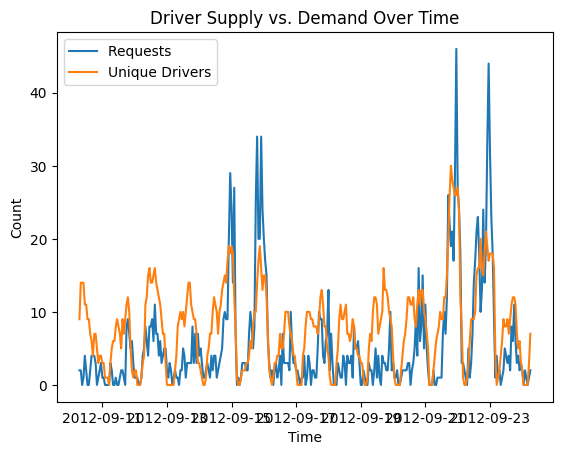

In [129]:
plt.plot(new['Timestamp'], df['Requests '], label='Requests ')
plt.plot(new['Timestamp'], df['Unique Drivers'], label='Unique Drivers')
plt.legend()
plt.title('Driver Supply vs. Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

Question 8
In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [144]:
# Step 2: Calculate the rolling 72 hours eyeballs sum
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df['Eyeballs_Sum'] = df['Eyeballs '].rolling(window=indexer, min_periods=1).sum()
df['Zeroes_Sum'] = df['Zeroes '].rolling(window=indexer, min_periods=1).sum()


df['ratio'] = df['Eyeballs_Sum']/df['Zeroes_Sum']
df = df[np.isfinite(df['ratio'])]

# Step 3: Find the maximum rolling sum
max = df['ratio'].max()
start_time = df['ratio'].idxmax()
end_time = start_time + pd.Timedelta(hours=72)
print('The highest ratio of Zeroes to Eyeballs in a 72-hour period is', max, 'from', start_time, 'to', end_time)

The highest ratio of Zeroes to Eyeballs in a 72-hour period is 9.0 from 2012-09-24 06:00:00 to 2012-09-27 06:00:00


Question 9
If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

The peak hour for completed trips is 22:00:00 with 134 trips


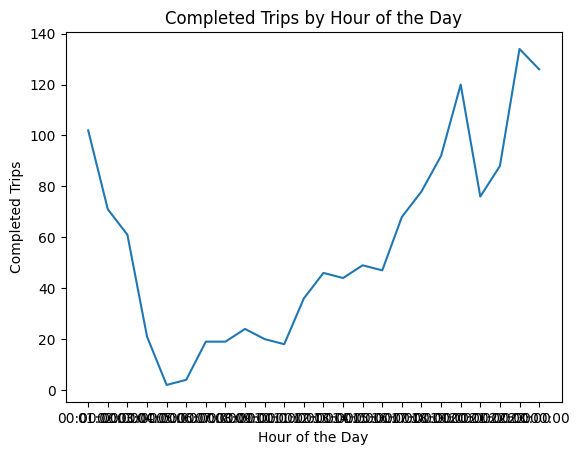

In [153]:
# Group the data by hour of the day and sum trips across all days
trips_by_hour = df.groupby('Time (Local)')['Completed Trips '].sum()
#print(trips_by_hour)
peak_hour = trips_by_hour.idxmax()
peak_trips = trips_by_hour.max()
print(f'The peak hour for completed trips is {peak_hour} with {peak_trips} trips')

# Visualize the data
plt.plot(trips_by_hour)
plt.title('Completed Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Completed Trips')
plt.show()

Question 10: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [178]:
# Group by 'Date' to find minimum supply and demand per day
supply_min_per_day = df.groupby('Date')['Unique Drivers'].min().reset_index(name='Min Unique Drivers')
demand_min_per_day = df.groupby('Date')['Requests '].min().reset_index(name='Min Requests')

# Merge supply and demand data into a single DataFrame
supply_demand = pd.merge(supply_min_per_day, demand_min_per_day, on='Date', suffixes=('_supply', '_demand'))

# Merge the supply-demand data back with the original DataFrame
df = pd.merge(df, supply_demand, on='Date')

# Output the result
min_point = df[
    (df['Unique Drivers'] == df['Min Unique Drivers']) & 
    (df['Requests '] == df['Min Requests'])
]['Time (Local)'].mode()

print(f"The time with the lowest supply and demand is: {min_point.values}")


The time with the lowest supply and demand is: [4]


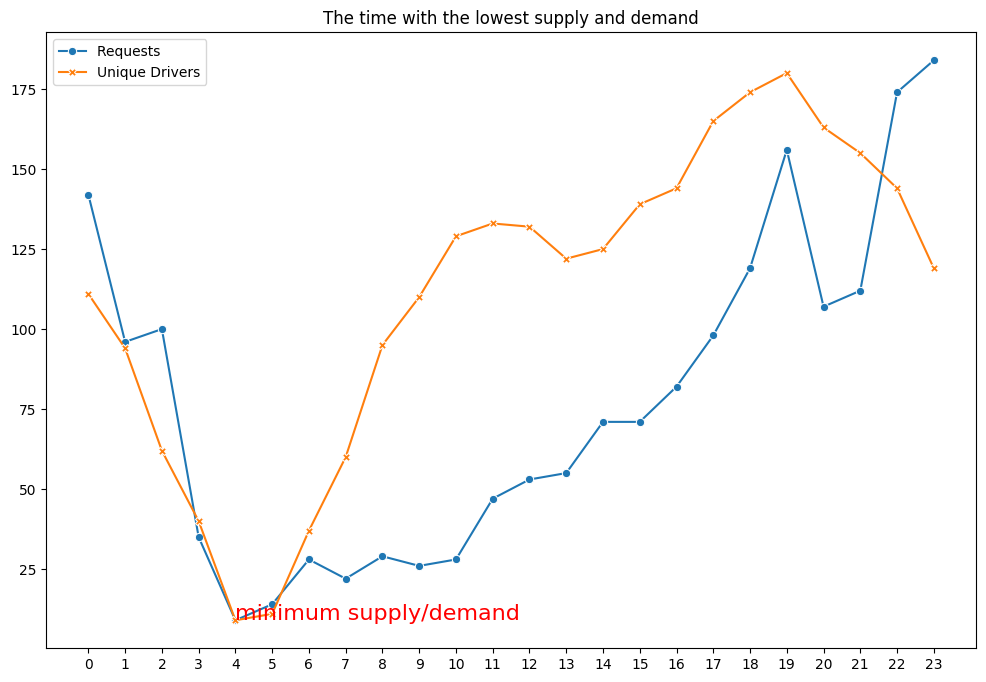

In [184]:
# Visualize the data
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
min_point_value = df_agg_time['Requests '][min_point[0]]
plt.figure(figsize=(12,8))
plt.title('The time with the lowest supply and demand')
fig = sns.lineplot(data=df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_point_value), color='r', fontsize=16)
plt.show()